# KNN Brute algorithm on Amazon fine food dataset

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review

#### Objective:
To perform KNN brute algorithm on different vectors like BOW, Tf-idf, Avg-W2vec & Tf-idf_W2vec.

In [13]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#Importing Cleaned & Deduped dataset
# using the SQLite Table to read data.
con = sqlite3.connect('C:/Users/deepak/Documents/Applied AI assignments/3. Tsne on Amazon fine food/final.sqlite') 

In [3]:
Data = pd.read_sql_query(""" SELECT * FROM Reviews""", con) 

In [4]:
Data.head(5)

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...


In [5]:
Data['Score'].value_counts()

positive    307061
negative     57110
Name: Score, dtype: int64

In [7]:
#Doing Time based splitting
data_amazon_fine=Data.sort_values("Time",ascending = True)

In [15]:
#Using sample 100K points for doing KNN
# 80K points for train and 20K for test
train_data=data_amazon_fine.iloc[:80000]
test_data=data_amazon_fine.iloc[80000:100000]

In [13]:
train_data.shape

(80000, 12)

In [16]:
train_data['Score'].value_counts()

positive    70407
negative     9593
Name: Score, dtype: int64

In [17]:
test_data.shape

(20000, 12)

In [18]:
test_data['Score'].value_counts()

positive    17322
negative     2678
Name: Score, dtype: int64

In [19]:
#Storing Train and test data for further assignments
train_data.to_csv("E:/Applied AI assignments/Amazon_fine_train_data.csv")
test_data.to_csv("E:/Applied AI assignments/Amazon_fine_test_data.csv")

In [3]:
train_data=pd.read_csv("E:/Applied AI assignments/Amazon_fine_train_data.csv")
test_data=pd.read_csv("E:/Applied AI assignments/Amazon_fine_test_data.csv")

In [4]:
train_data=train_data.astype(str)
tesdt_data=test_data.astype(str)

In [5]:
#Train data
y_train = train_data['Score']
x_train = train_data['CleanedText']

#Test data
y_test = test_data['Score']
x_test = test_data['CleanedText'] 

#### Binary Bow

In [19]:
count_vect = CountVectorizer(binary=True)

#Train data
vocabulary = count_vect.fit(x_train) #in scikit-learn
Bow_x_train= count_vect.transform(x_train)
print("the type of count vectorizer ",type(Bow_x_train))
print("the shape of out text BOW vectorizer ",Bow_x_train.get_shape())
print("the number of unique words ", Bow_x_train.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (80000, 33433)
the number of unique words  33433


In [20]:
#Test data
Bow_x_test = count_vect.transform(x_test)
print("the type of count vectorizer ",type(Bow_x_test))
print("the shape of out text BOW vectorizer ",Bow_x_test.get_shape())
print("the number of unique words ", Bow_x_test.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (20000, 33433)
the number of unique words  33433


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

C:\Users\deepak\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Running Gridsearch CV 

In [60]:
myList = list(range(0,50))
k_range=list(filter(lambda x: x % 2 != 0, myList))
weight_options=['uniform','distance']

param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

# instantiate and fit the grid
grid = GridSearchCV(KNeighborsClassifier(algorithm='brute'), param_grid, cv=5, scoring='accuracy', return_train_score=False)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49], 'weights': ['uniform', 'distance']}


#### Fitting Gridsearch on BOW

In [61]:
grid.fit(Bow_x_train, y_train)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)


0.8817625
{'n_neighbors': 7, 'weights': 'distance'}


In [21]:
# KNN WITH BRUTE ALGO & UNIFORM WEIGHTS

knn_optimal = KNeighborsClassifier(n_neighbors=7,algorithm='brute',weights='distance',n_jobs=1)

# fitting the model
knn_optimal.fit(Bow_x_train, y_train)

# predict the response
pred_bow = knn_optimal.predict(Bow_x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred_bow) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (7, acc))


The accuracy of the knn classifier for k = 7 is 86.885000%


-------------------- Confusion matrix --------------------


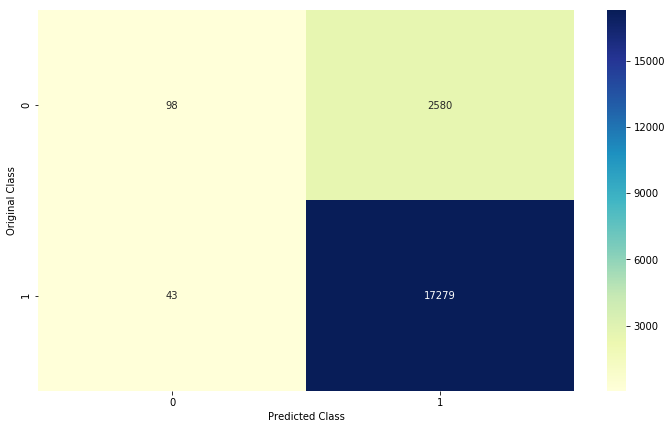

In [22]:
#Confusion matrix
CM=confusion_matrix(y_test, pred_bow)
labels = [0,1]
print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(CM, annot=True, cmap="YlGnBu", fmt="g", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

### Tf-Idf

In [24]:
#Initiating Vectorizer
count_vect = CountVectorizer(ngram_range=(1,2))

#Train data
vocabulary = count_vect.fit(x_train)
Tfidf_x_train= count_vect.transform(x_train)
print("the type of count vectorizer ",type(Tfidf_x_train))
print("the shape of out text BOW vectorizer ",Tfidf_x_train.get_shape())
print("the number of unique words ", Tfidf_x_train.get_shape()[1])

the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (80000, 1013943)
the number of unique words  1013943


In [25]:
#Test data
Tfidf_x_test= count_vect.transform(x_test)
print("the type of co unt vectorizer ",type(Tfidf_x_test))
print("the shape of out text BOW vectorizer ",Tfidf_x_test.get_shape())
print("the number of unique words ", Tfidf_x_test.get_shape()[1])

the type of co unt vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (20000, 1013943)
the number of unique words  1013943


#### Fitting gridsearch on Tf-IDf

In [62]:
grid.fit(Tfidf_x_train, y_train)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)


0.88045
{'n_neighbors': 15, 'weights': 'distance'}


In [26]:
# KNN WITH BRUTE ALGO & DISTANCE WEIGHTS

knn_optimal = KNeighborsClassifier(n_neighbors=15,algorithm='brute',weights='distance',n_jobs=1)

# fitting the model
knn_optimal.fit(Tfidf_x_train, y_train)

# predict the response
pred_tfidf = knn_optimal.predict(Tfidf_x_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred_tfidf) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (15, acc))


The accuracy of the knn classifier for k = 15 is 86.710000%


-------------------- Confusion matrix --------------------


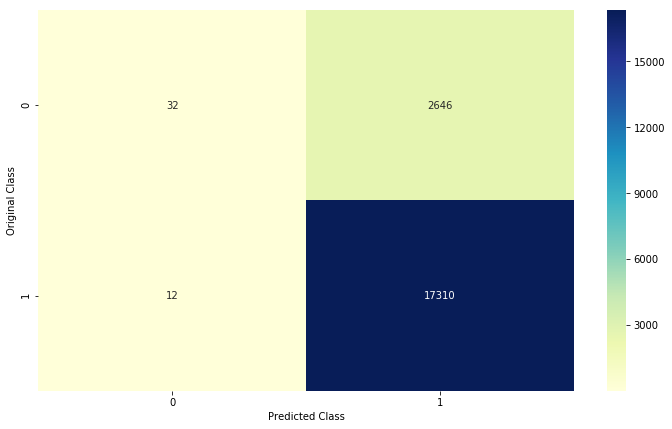

In [27]:
#Confusion matrix
CM=confusion_matrix(y_test, pred_tfidf)
labels = [0,1]
print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(CM, annot=True, cmap="YlGnBu", fmt="g", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#### W2V

In [6]:
#W2V list of Training data
i=0
list_of_sent_train=[]
for sent in train_data['CleanedText'].values:
    list_of_sent_train.append(sent.split())

In [7]:
#W2V List of Test data
i=0
list_of_sent_test=[]
for sent in test_data['CleanedText'].values:
    list_of_sent_test.append(sent.split())

In [8]:
#Training W2V train model
# min_count = 5 considers only words that occured atleast 5 times
w2v_model_train=Word2Vec(list_of_sent_train,min_count=5,size=50, workers=6)

In [9]:
w2v_words_train = list(w2v_model_train.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words_train))
print("sample words ", w2v_words_train[0:50])

number of words that occured minimum 5 times  11361
sample words  ['witti', 'littl', 'book', 'make', 'son', 'laugh', 'loud', 'car', 'drive', 'along', 'alway', 'sing', 'refrain', 'hes', 'learn', 'whale', 'india', 'droop', 'love', 'new', 'word', 'introduc', 'silli', 'classic', 'will', 'bet', 'still', 'abl', 'memori', 'colleg', 'rememb', 'see', 'show', 'air', 'televis', 'year', 'ago', 'child', 'sister', 'later', 'bought', 'day', 'thirti', 'someth', 'use', 'seri', 'song', 'student', 'teach', 'preschool']


#### Avg W2V 

In [35]:
#Train data
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_train_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_train:
            vec = w2v_model_train.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_train_avgw2v.append(sent_vec)
print(len(sent_vectors_train_avgw2v))
print(len(sent_vectors_train_avgw2v[0]))

80000
50


In [36]:
#Test data
# average Word2Vec
# compute average word2vec for each review.
sent_vectors_test_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent_test: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_train:
            vec = w2v_model_train.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors_test_avgw2v.append(sent_vec)
print(len(sent_vectors_test_avgw2v))
print(len(sent_vectors_test_avgw2v[0]))

20000
50


#### Fitting gridearch on Avg-W2v

In [63]:
grid.fit(sent_vectors_train_avgw2v, y_train)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)


0.8967375
{'n_neighbors': 13, 'weights': 'distance'}


In [37]:
# KNN WITH BRUTE ALGO & DISTANCE WEIGHTS

knn_optimal = KNeighborsClassifier(n_neighbors=13,algorithm='brute',weights='distance',n_jobs=1)

# fitting the model
knn_optimal.fit(sent_vectors_train_avgw2v, y_train)

# predict the response
pred_Avgw2v = knn_optimal.predict(sent_vectors_test_avgw2v)

# evaluate accuracy
acc = accuracy_score(y_test, pred_Avgw2v) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (13, acc))


The accuracy of the knn classifier for k = 13 is 88.630000%


-------------------- Confusion matrix --------------------


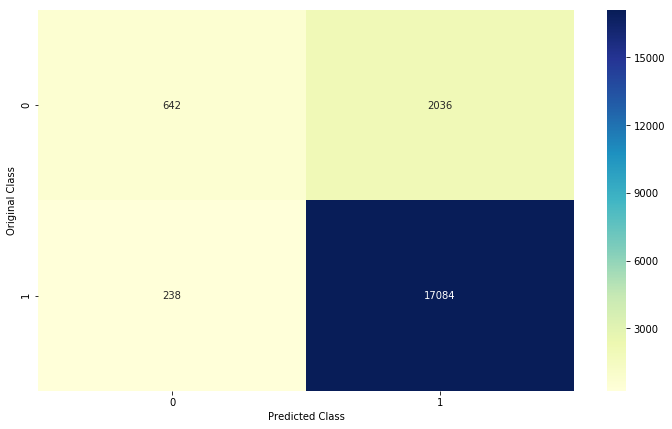

In [38]:
#Confusion matrix
CM=confusion_matrix(y_test, pred_Avgw2v)
labels = [0,1]
print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(CM, annot=True, cmap="YlGnBu", fmt="g", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

#### Tfidf_w2v

In [11]:
tf_idf_vect = TfidfVectorizer()
vocabulary = tf_idf_vect.fit(train_data['CleanedText'])
final_tf_idf= tf_idf_vect.transform(train_data['CleanedText'])

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(vocabulary.get_feature_names(), list(tf_idf_vect.idf_)))

In [14]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_w2v_sent_vectors_train = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_train): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_train:
            vec = w2v_model_train.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_w2v_sent_vectors_train.append(sent_vec)
    row += 1

100%|██████████████████████████████████████████████████████████████████████████| 80000/80000 [01:07<00:00, 1191.75it/s]


In [16]:
final_tf_idf= tf_idf_vect.transform(test_data['CleanedText'])

tfidf_w2v_sent_vectors_test = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sent_test): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words_train:
            vec = w2v_model_train.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_w2v_sent_vectors_test.append(sent_vec)
    row += 1

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:17<00:00, 1148.54it/s]


#### Fitting gridsearch on Tfidf-W2vec 

In [64]:
grid.fit(tfidf_w2v_sent_vectors_train, y_train)

# examine the best model
print(grid.best_score_)
print(grid.best_params_)


0.8924
{'n_neighbors': 25, 'weights': 'distance'}


In [16]:
# KNN WITH BRUTE ALGO & DISTANCE WEIGHTS

knn_optimal = KNeighborsClassifier(n_neighbors=25,algorithm='brute',weights='distance',n_jobs=1)

# fitting the model
knn_optimal.fit(tfidf_w2v_sent_vectors_train, y_train)

# predict the response
pred_tfidf_w2v = knn_optimal.predict(tfidf_w2v_sent_vectors_test)

# evaluate accuracy
acc = accuracy_score(y_test, pred_tfidf_w2v) * 100
print('\nThe accuracy of the knn classifier for k = %d is %f%%' % (25, acc))


The accuracy of the knn classifier for k = 25 is 87.900000%


-------------------- Confusion matrix --------------------


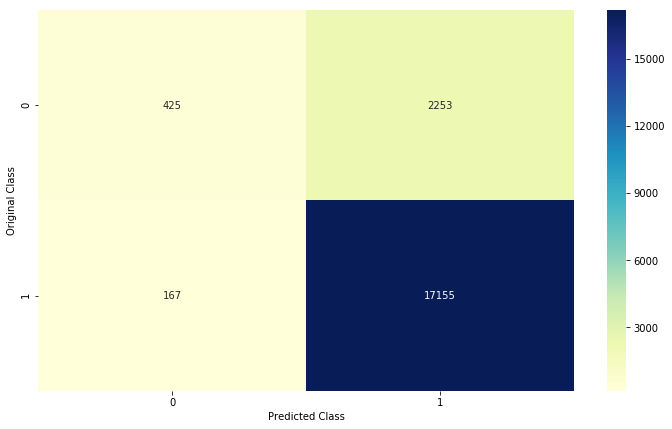

In [39]:
#Confusion matrix
CM=confusion_matrix(y_test, pred_tfidf_w2v)
labels = [0,1]
print("-"*20, "Confusion matrix", "-"*20)
plt.figure(figsize=(12,7))
sns.heatmap(CM, annot=True, cmap="YlGnBu", fmt="g", xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()